In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

# Data Set Description

a dataset of IBM employee attrition data. Each row is personal and attrition information of an employee. 



1.   Attrition: Whether employees are still with the company or whether they’ve gone to work somewhere else. **이직여부**
2. Age: 18 to 60 years old **나이** 
3. Gender: Female or Male **성별**
4. Department: Research & Development, Sales, Human Resources. **부서**
5. BusinessTravel: Travel_Rarely, Travel_Frequently, Non-Travel. **출장빈도**
6. DistanceFromHome: Distance between the company and their home in miles. **출퇴근거리**
7. MonthlyIncome: Employees' numeric monthly income. **월수입**
8. MaritalStatus: Married, Single, Divorced. **결혼 여부**
9. Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'. **교육**
10. EducationField: Life Sciences， Medical， Marketing，Technical Degree，Other. **분야 (교육)**
11. EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. **환경 만족도**
12. RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. **관계 만족도**
13. JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. 
14. JobRole: Sales Executive，Research Science, Laboratory Tec, Manufacturing, Healthcare Rep, etc **직무 역할**
15. JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. **직무 만족도**
16. OverTime: Whether they work overtime or not. **야근(초과근무)**
17. NumCompaniesWorked: Number of companies they worked for before joinging IBM. **IBM 재직 전 근무한 기업 수**
18. PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'. **성능 평가**
19. YearsAtCompany: Years they worked for IBM. **IBM 재직 년수**
20. WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. **워라밸**
21. YearsSinceLastPromotion: Years passed since their last promotion.**마지막으로 승진한 후로부터 몇 년이 지났는지**

22. DailyRate **일급**
23. EmployeeCount **직원수**
24. EmployeeNumber **직원번호**
25. HourlyRate **시급**
26. JobLevel 
27. MonthlyRate **월급**
28. Over18
29. PercentSalaryHike **급여 인상률**
30. StandardHours
31. StockOptionLevel
32. TotalWorkingYears
33. TrainingTimesLastYear
34. YearsInCurrentRole
35. YearsWithCurrManager

1. Age : 해당 직원의 나이
2. Attrition : 퇴직 여부 Target값 (종속변수)
3. BusinessTravel : 출장의 빈도
4. DailyRate : 일 대비 급여의 수준
5. Department : 업무분야
6. DistanceFromHome : 집과의 거리
7. Education : 교육의 정도
8. EducationField : 전공
9. EmployeeCount : 직원 숫자
10. EmployeeNumber : 직원 ID
11. EnvironmentSatisfaction : 업무 환경에 대한 만족도
12. Gender : 성별
13. HourlyRate : 시간 대비 급여의 수준
14. JobInvolvement : 업무 참여도
15. JobLevel : 업무의 수준
16. JobRole : 업무 종류
17. JobSatisfaction : 업무 만족도
18. MaritalStatus : 결혼 여부
19. MonthlyIncome : 월 소득
20. MonthlyRate : 월 대비 급여 수준
21. NumCompaniesWorked : 일한 회사의 수
22. Over18 : 18세 이상
23. OverTime : 규정외 노동시간
24. PercentSalaryHike : 급여의 증가분 백분율
25. PerformanceRating : 업무 성과
26. RelationshipSatisfaction : 대인관계 만족도
27. StandardHours : 표준 시간
28. StockOptionLevel : 스톡옵션 정도
29. TotalWorkingYears : 경력 기간
30. TrainingTimesLastYear : 교육 시간
31. WorkLifeBalance : 일과 생활의 균형 정도
32. YearsAtCompany : 근속 연수
33. YearsInCurrentRole : 현재 역할의 년수
34. YearsSinceLastPromotion : 마지막 프로모션
35. YearsWithCurrManager : 현재 관리자와 함께 보낸 시간

# 자료읽기

In [11]:
data = pd.read_csv("assignment_data.csv", encoding="UTF8")

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [14]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
data.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
331,27,No,Non-Travel,210,Sales,1,1,Marketing,1,449,...,4,80,1,6,0,3,5,4,1,4
937,39,No,Travel_Rarely,412,Research & Development,13,4,Medical,1,1307,...,4,80,2,21,4,3,19,9,15,2
532,47,No,Travel_Rarely,703,Sales,14,4,Marketing,1,728,...,4,80,0,20,2,3,7,7,1,7
1250,29,No,Travel_Frequently,461,Research & Development,1,3,Life Sciences,1,1753,...,4,80,0,10,5,4,3,2,0,2
646,53,No,Travel_Rarely,868,Sales,8,3,Marketing,1,897,...,3,80,1,28,3,3,2,0,2,2
1279,44,Yes,Travel_Frequently,429,Research & Development,1,2,Medical,1,1792,...,3,80,3,6,2,2,5,3,2,3
30,33,No,Travel_Rarely,924,Research & Development,2,3,Medical,1,39,...,4,80,0,7,3,3,1,1,0,0
27,42,No,Travel_Rarely,691,Sales,8,4,Marketing,1,35,...,4,80,1,10,2,3,9,7,4,2
864,41,Yes,Non-Travel,906,Research & Development,5,2,Life Sciences,1,1210,...,1,80,1,5,2,1,1,0,0,0
1313,29,Yes,Travel_Rarely,350,Human Resources,13,3,Human Resources,1,1844,...,4,80,3,4,3,3,2,2,2,0


In [16]:
categorical_features = [ col for col in data.columns if data[col].dtypes == "object"]
numeric_features = [ col for col in data.columns if data[col].dtypes == "int64"]

In [17]:
print('범주형 변수 개수:', len(categorical_features))
print('수치형 변수 개수:', len(numeric_features))
print('총 변수 개수:', len(categorical_features) + len(numeric_features))

범주형 변수 개수: 9
수치형 변수 개수: 26
총 변수 개수: 35


# 결측

In [18]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

결측치 없음.

# 전처리
* 범주형 변수를 factor화
* 가변수는 그대로 숫자형으로 사용

In [19]:
df = pd.get_dummies(data)

In [20]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [22]:
original_features = data.columns.tolist()
processed_features = df.columns.tolist()

In [24]:
numerical = list(set(processed_features).intersection(original_features))
categorical = list(set(processed_features) - set(numerical))

print('범주형 변수 개수:', len(categorical))
print('수치형 변수 개수:', len(numerical))
print('총 변수 개수:', len(processed_features))

범주형 변수 개수: 31
수치형 변수 개수: 26
총 변수 개수: 57


# EDA

## 단변량 탐색

In [25]:
df[numerical].describe()

,TrainingTimesLastYear,MonthlyIncome,WorkLifeBalance,MonthlyRate,YearsSinceLastPromotion,HourlyRate,JobLevel,EnvironmentSatisfaction,YearsInCurrentRole,DailyRate,...,TotalWorkingYears,RelationshipSatisfaction,YearsWithCurrManager,DistanceFromHome,EmployeeNumber,StockOptionLevel,EmployeeCount,JobInvolvement,PercentSalaryHike,NumCompaniesWorked
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000
mean,2.799320,6502.931293,2.761224,14313.103401,2.187755,65.891156,2.063946,2.721769,4.229252,802.485714,...,11.279592,2.712245,4.123129,9.192517,1024.865306,0.793878,1.0,2.729932,15.209524,2.693197
std,1.289271,4707.956783,0.706476,7117.786044,3.222430,20.329428,1.106940,1.093082,3.623137,403.509100,...,7.780782,1.081209,3.568136,8.106864,602.024335,0.852077,0.0,0.711561,3.659938,2.498009
min,0.000000,1009.000000,1.000000,2094.000000,0.000000,30.000000,1.000000,1.000000,0.000000,102.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,11.000000,0.000000
25%,2.000000,2911.000000,2.000000,8047.000000,0.000000,48.000000,1.000000,2.000000,2.000000,465.000000,...,6.000000,2.000000,2.000000,2.000000,491.250000,0.000000,1.0,2.000000,12.000000,1.000000
50%,3.000000,4919.000000,3.000000,14235.500000,1.000000,66.000000,2.000000,3.000000,3.000000,802.000000,...,10.000000,3.000000,3.000000,7.000000,1020.500000,1.000000,1.0,3.000000,14.000000,2.000000
75%,3.000000,8379.000000,3.000000,20461.500000,3.000000,83.750000,3.000000,4.000000,7.000000,1157.000000,...,15.000000,4.000000,7.000000,14.000000,1555.750000,1.000000,1.0,3.000000,18.000000,4.000000
max,6.000000,19999.000000,4.000000,26999.000000,15.000000,100.000000,5.000000,4.000000,18.000000,1499.000000,...,40.000000,4.000000,17.000000,29.000000,2068.000000,3.000000,1.0,4.000000,25.000000,9.000000


## 이변량 탐색

### 연속 ~ 이산

### 연속 ~ 연속

### 이산 ~ 이산

## 2. 유의미한 시각화 7개 이상

### Attrition 확인

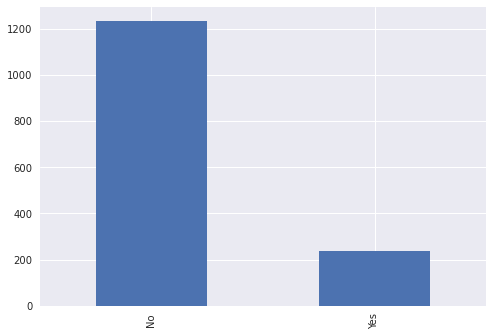

In [130]:
data['Attrition'].value_counts().plot(kind='bar')
plt.show()

### 범주형 변수 탐색

In [108]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

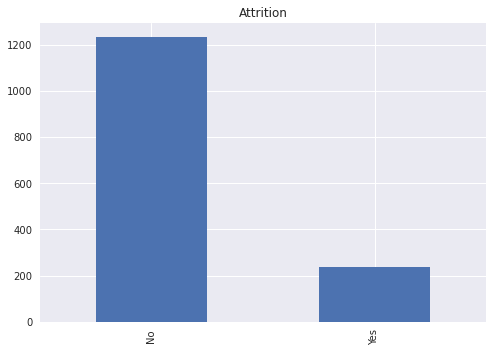

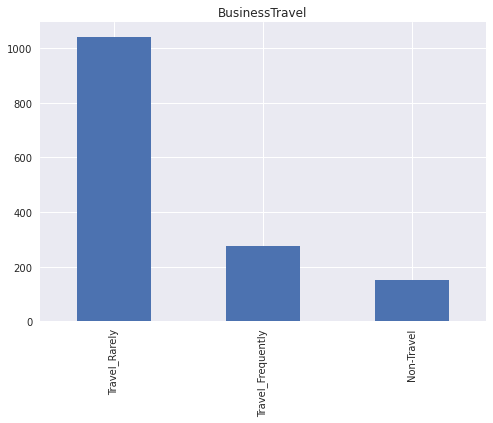

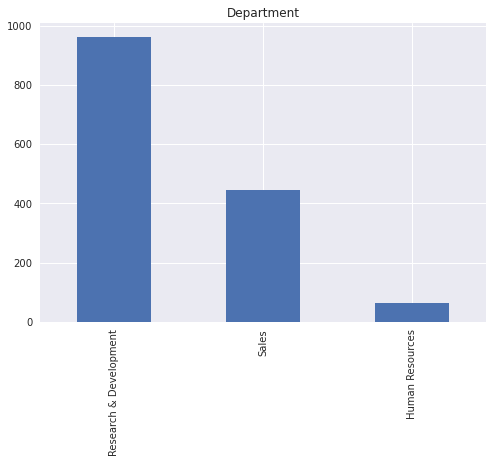

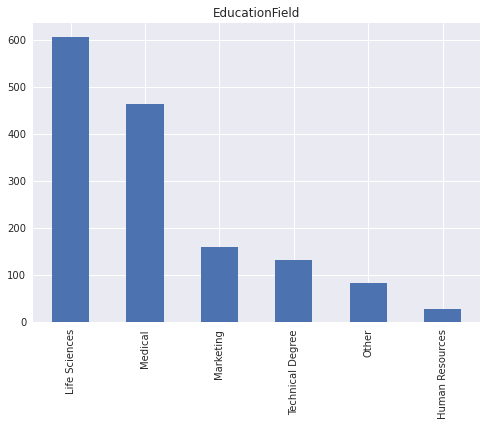

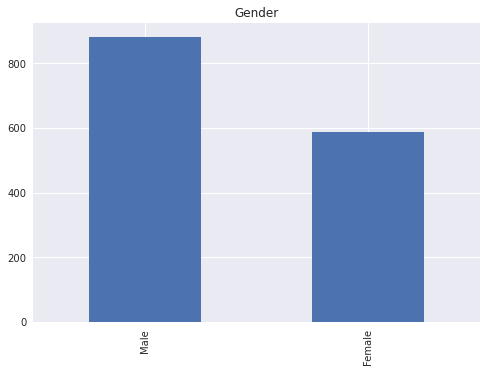

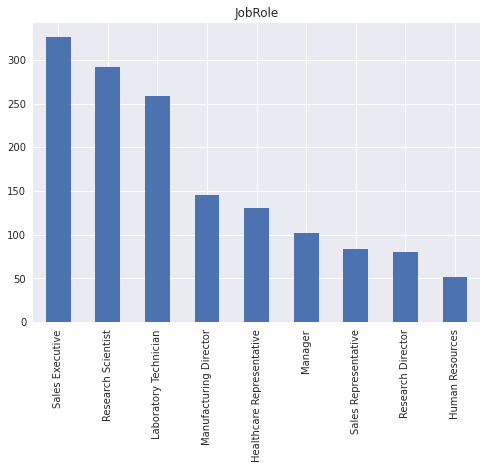

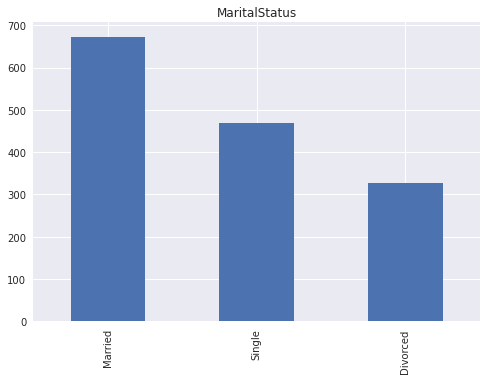

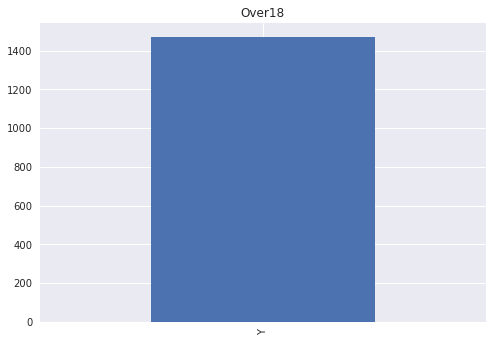

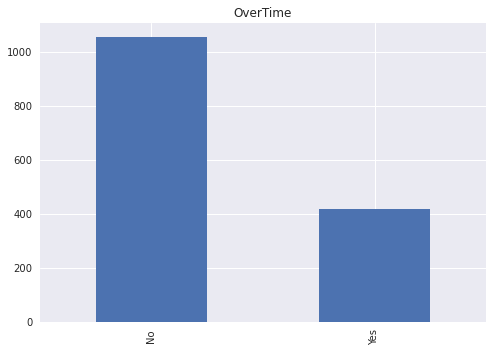

In [107]:
for col in categorical_features:
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

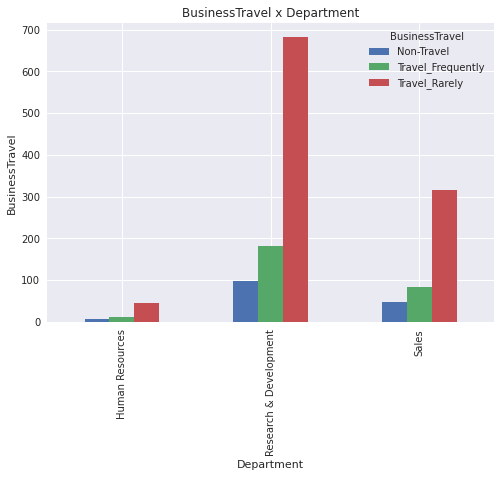

In [116]:
# 부서별 출장빈도 시각화
BT_Dp = data.groupby(['BusinessTravel', 'Department'])['BusinessTravel'].count().unstack('BusinessTravel')

BT_Dp.plot(kind='bar')
plt.ylabel('BusinessTravel')
plt.title('BusinessTravel x Department')
plt.show()

부서인원수로 나눠서 비율로 해야겠는걸 하지만 딱봐도 중간이 가장 자주 한다

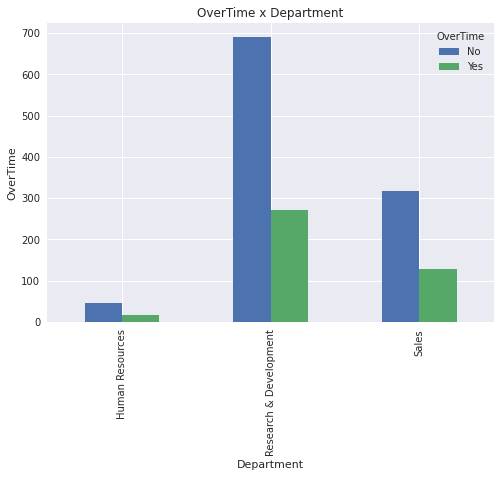

In [119]:
# 부서별 야근 여부 시각화
# 할거면 비율로
# BT_Dp = data.groupby(['OverTime', 'Department'])['OverTime'].count().unstack('OverTime')

# BT_Dp.plot(kind='bar')
# plt.ylabel('OverTime')
# plt.title('OverTime x Department')
# plt.show()

### 수치형 변수 탬색

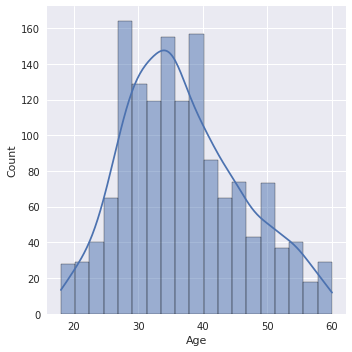

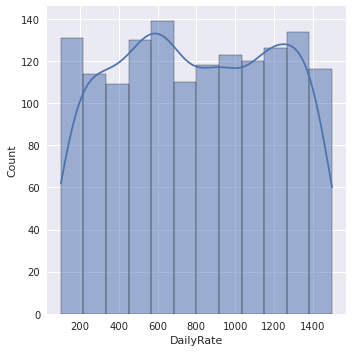

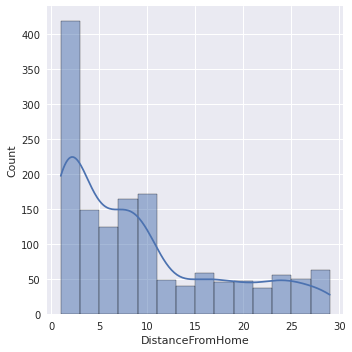

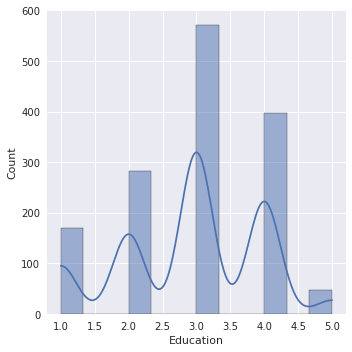

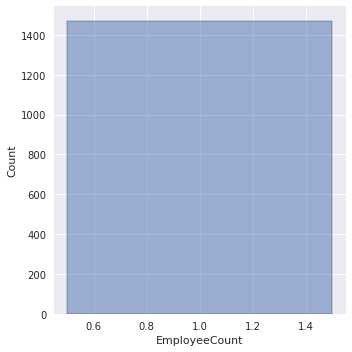

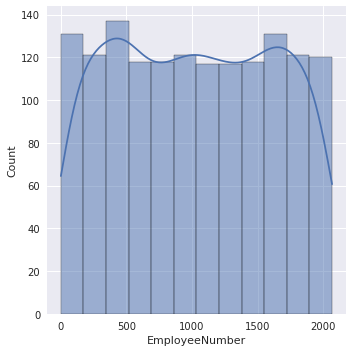

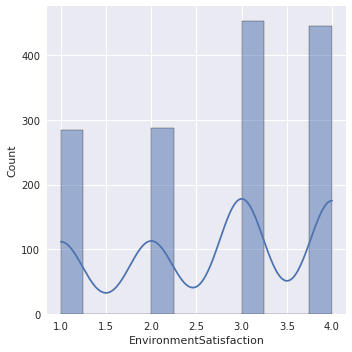

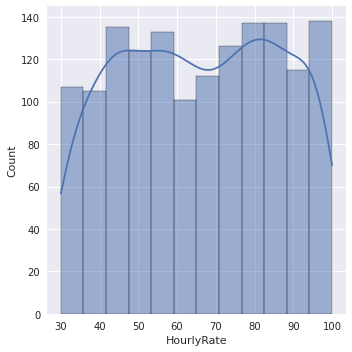

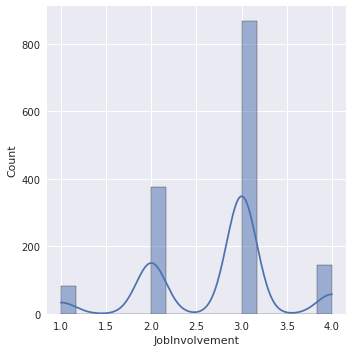

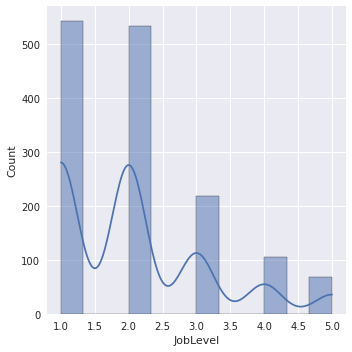

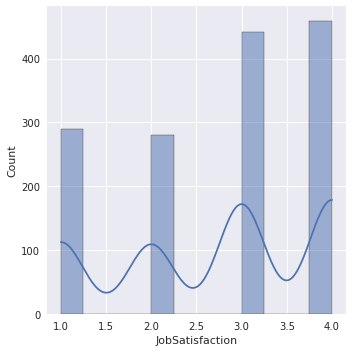

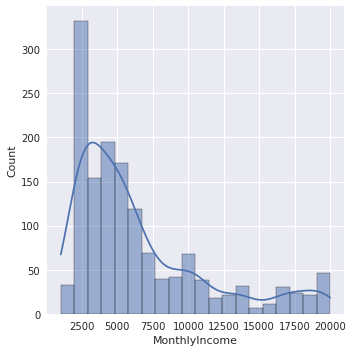

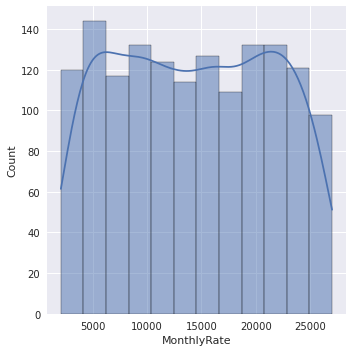

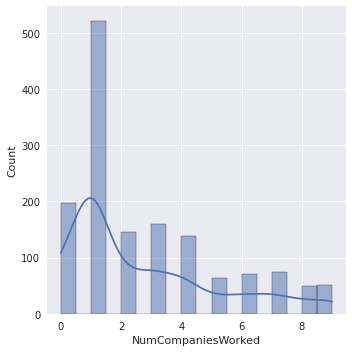

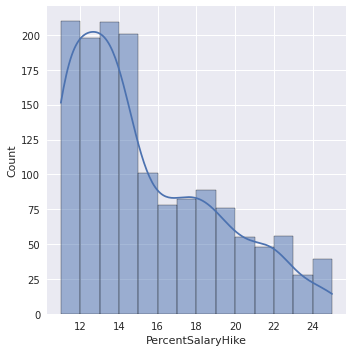

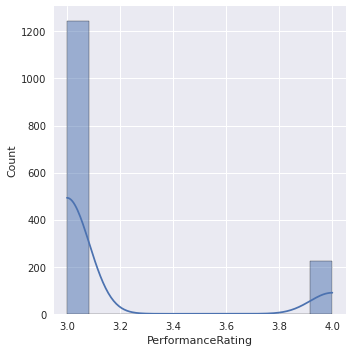

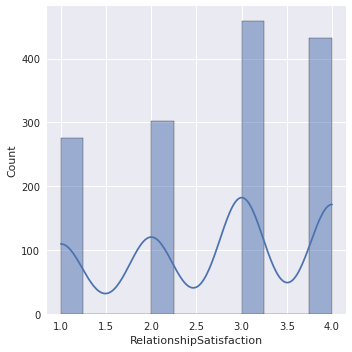

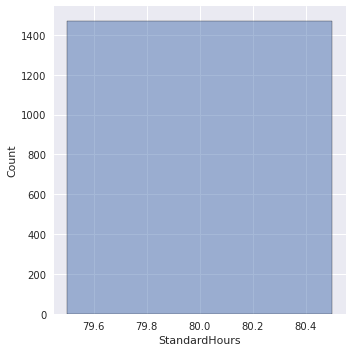

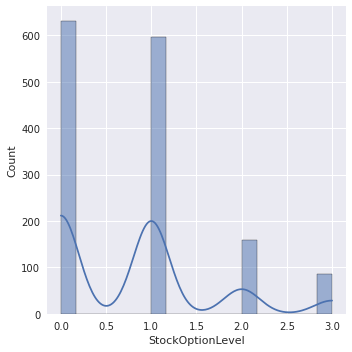

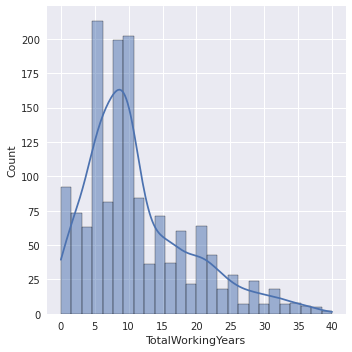

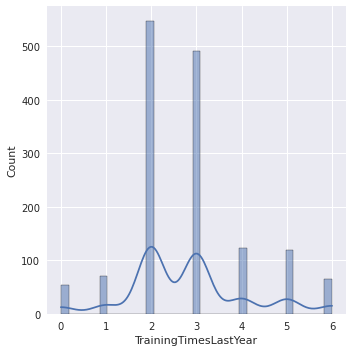

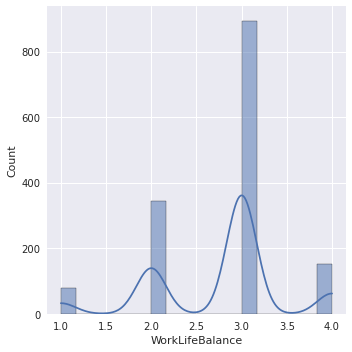

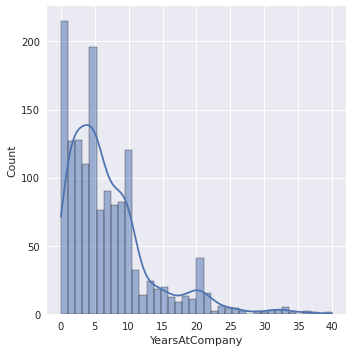

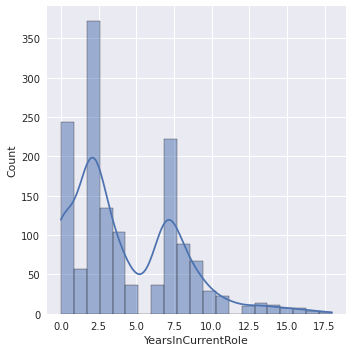

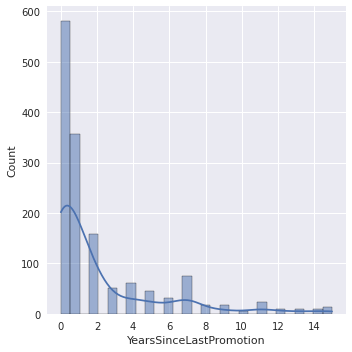

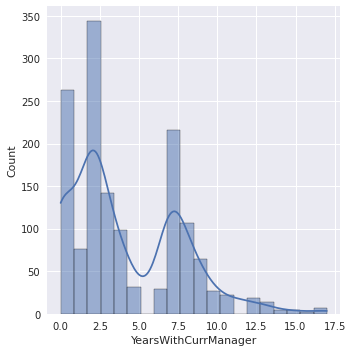

In [128]:
for col in numeric_features:
    sns.displot(data.loc[data[col].notnull(), col], kde=True)
    plt.show()

ordinal scale(순서형 변수): Education(1,2,3,4,5), EnvironmentSatisfaction(1,2,3,4), JobInvolvement(1,2,3,4), JobLevel(1,2,3,4,5), JobSatisfaction(1,2,3,4), PerformancRating(3,4), RelationshipSatisfaction(1,2,3,4), StockOptionLevel(0,1,2,3), WorkLifeBalance(1,2,3,4) <br>
그 외는 양적 변수

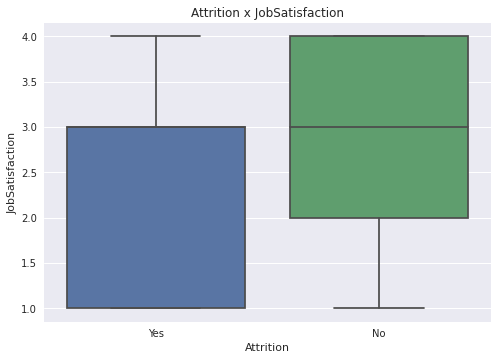

In [139]:
# 일단 해보기
unique_list = data['Attrition'].unique()

plt.figure()
sns.boxplot(x='Attrition', y='JobSatisfaction', data=data, hue=None)
plt.title("Attrition x JobSatisfaction")
plt.show()

In [168]:
# 이직한 사람들만 뽑아보기
attrition_filtered = data[data['Attrition'].str.contains('Yes')]
print('퇴직한 사람 수:',len(attrition_filtered))
print('퇴직률:',round(len(attrition_filtered)/len(data)*100,1),'%')

퇴직한 사람 수: 237
퇴직률: 16.1 %


In [172]:
attrition_filtered

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


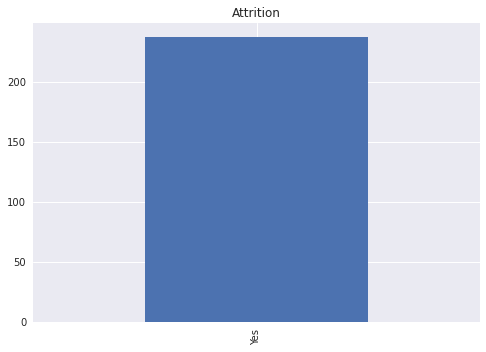

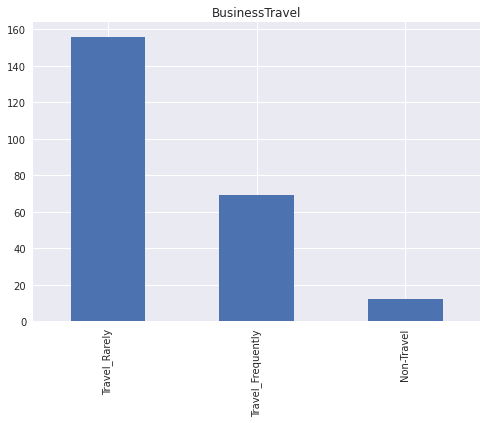

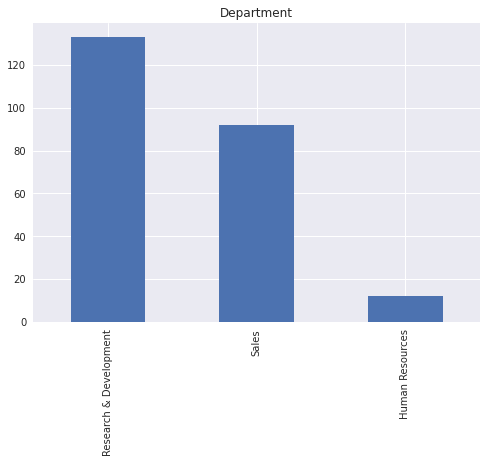

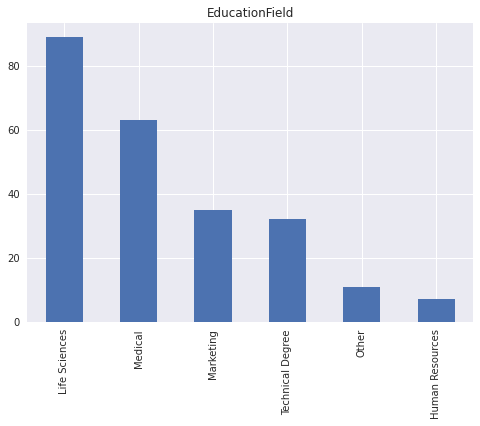

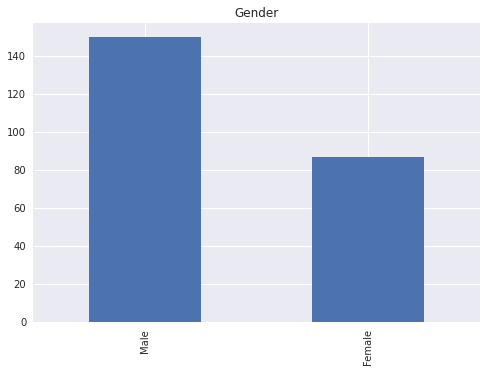

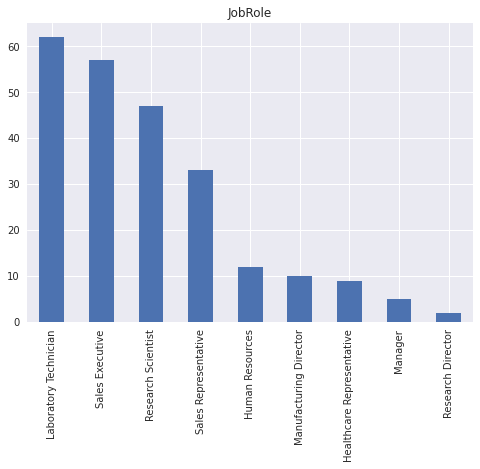

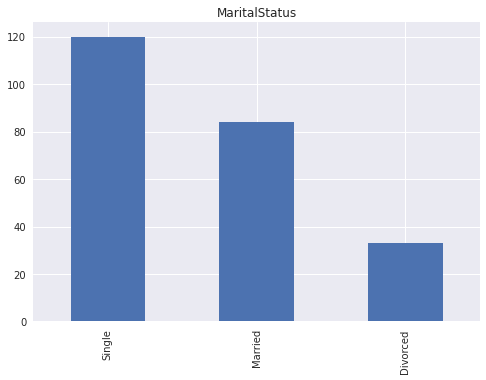

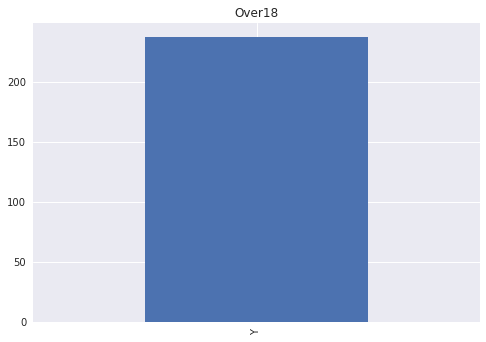

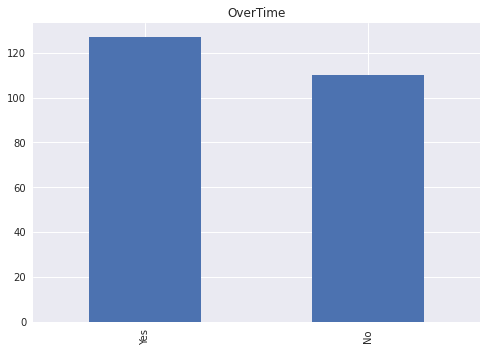

In [178]:
for col in categorical_features:
    attrition_filtered[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

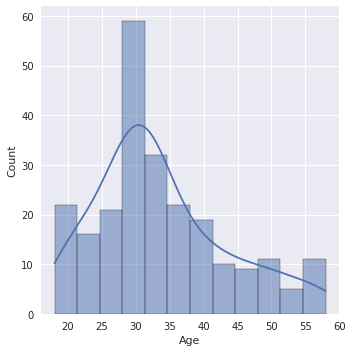

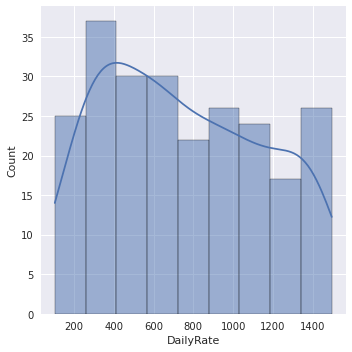

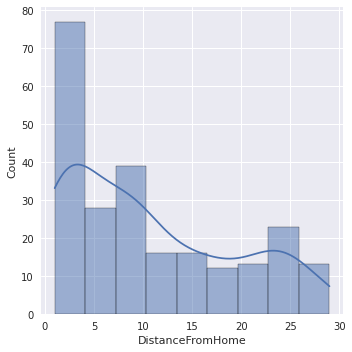

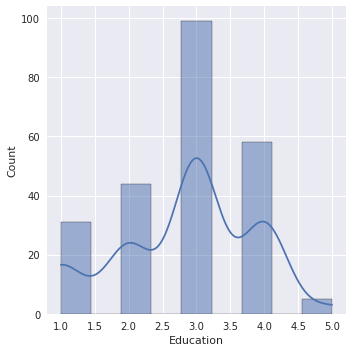

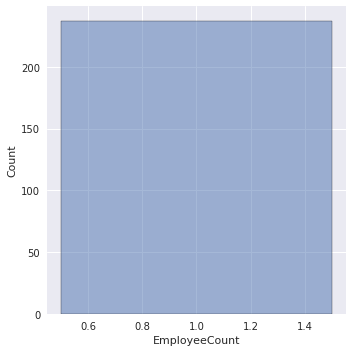

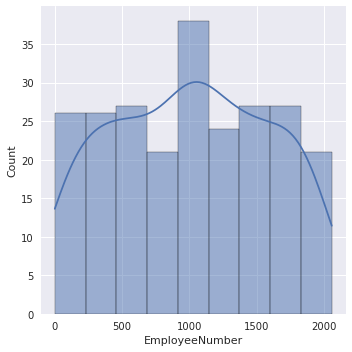

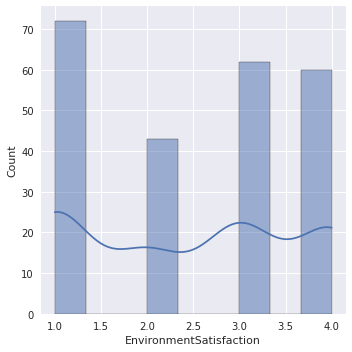

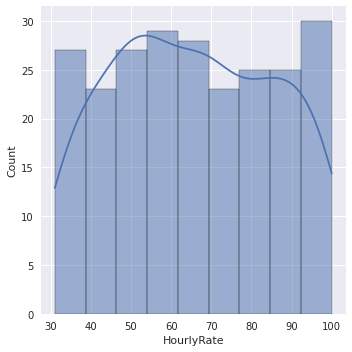

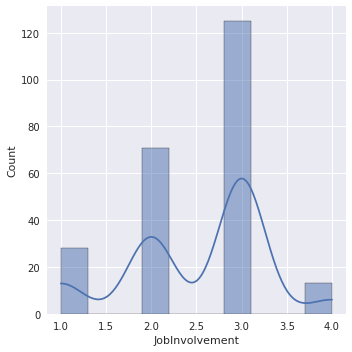

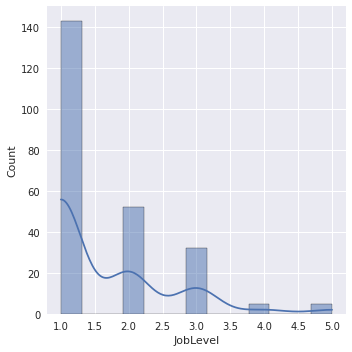

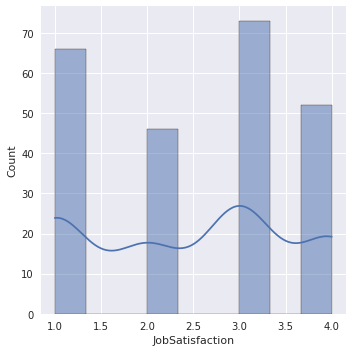

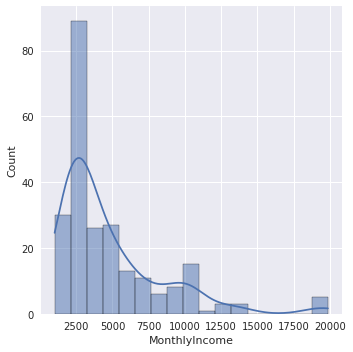

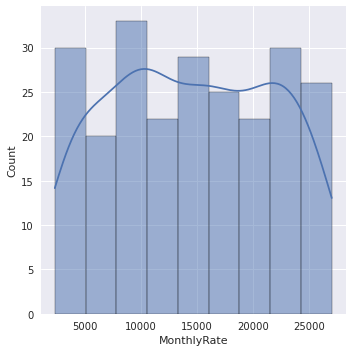

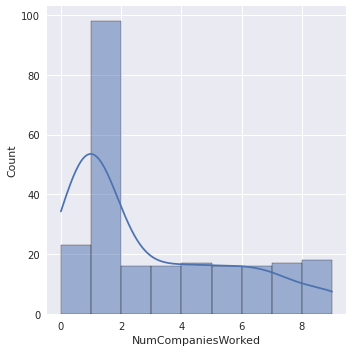

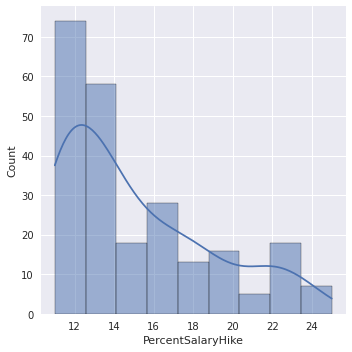

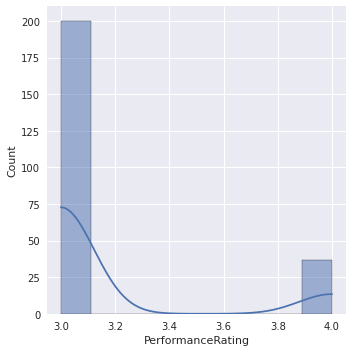

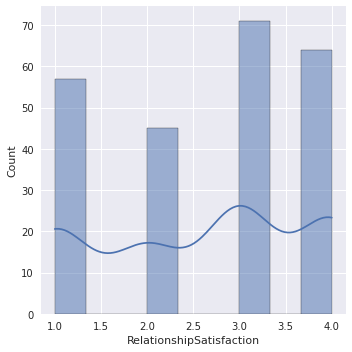

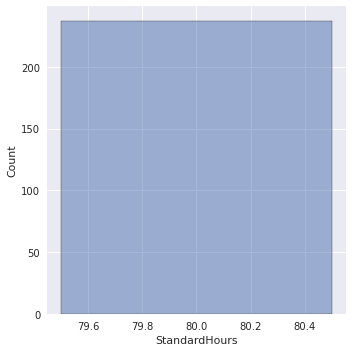

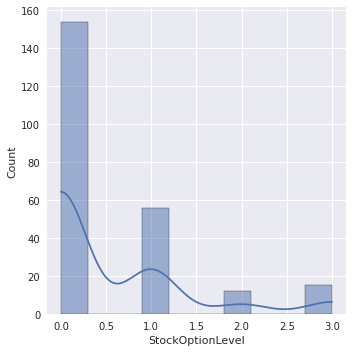

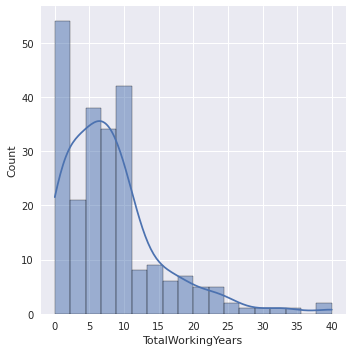

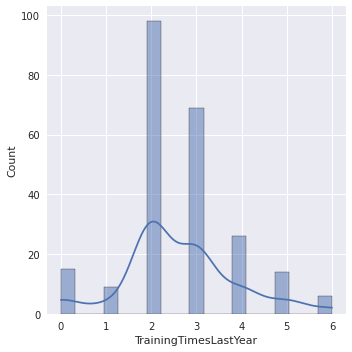

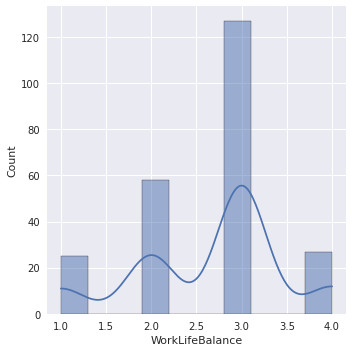

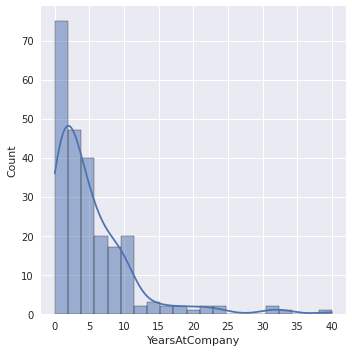

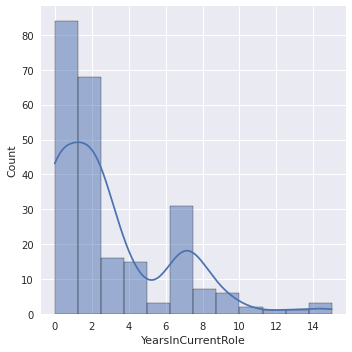

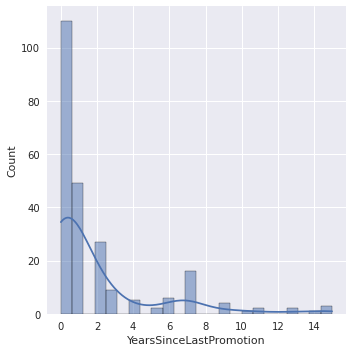

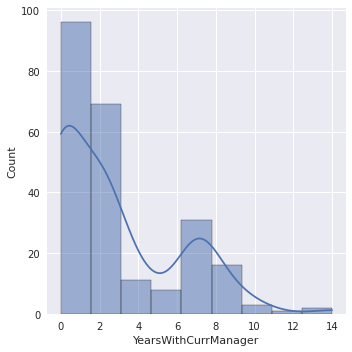

In [177]:
for col in numeric_features:
    sns.displot(attrition_filtered.loc[attrition_filtered[col].notnull(), col], kde=True)
    plt.show()

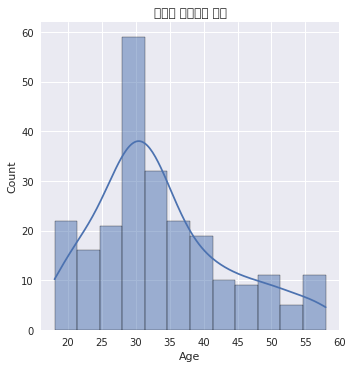

In [176]:
col = 'Age'
sns.displot(attrition_filtered.loc[attrition_filtered[col].notnull(), col], kde=True)
plt.title('퇴직한 사람들의 나이')
plt.show()

In [141]:
numeric_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
이직이랑 연관있을만한 수치형 변수 : age, monthlyincome, WorkLifeBalance, YearsSinceLastPromotion, JobLevel, RelationshipSatisfaction, 

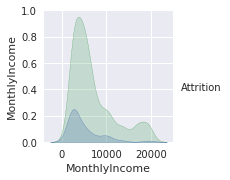

In [148]:
# 각 만족도와 이직의 관계
# satisfaction_list = ['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction']
# sns.pairplot(data[satisfaction_list + ['Attrition']], hue='Attrition', 
#              x_vars=satisfaction_list, y_vars=satisfaction_list)
# plt.show()

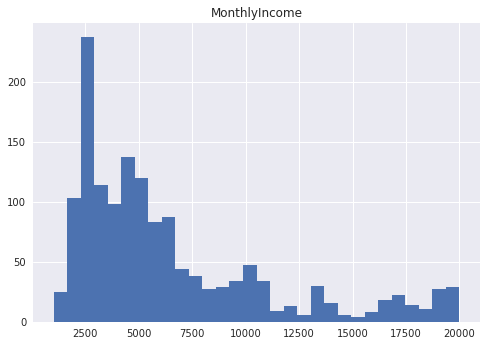

In [131]:
# 월급 확인
data['MonthlyIncome'].hist(bins=30)
plt.title('MonthlyIncome')
plt.show()

In [59]:
[i for i in numeric_values if 'Rate' in i]

['DailyRate', 'HourlyRate', 'MonthlyRate']

In [68]:
print(data["MonthlyRate"])
# print(data["DailyRate"][0])
# print(data["HourlyRate"][0])
# hours = 1102/94
# days = 19479/1102
# print(hours, days)

0       19479
1       24907
2        2396
3       23159
4       16632
        ...  
1465    12290
1466    21457
1467     5174
1468    13243
1469    10228
Name: MonthlyRate, Length: 1470, dtype: int64


In [ ]:
# 급여와 만족도 상관관계 
